# Import Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12,5
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

## Load Dataset

In [5]:
df = pd.read_csv('dataset/paymentdefault/train_20D8GL3.csv')

Dataset yang digunakan adalah data train untuk payment default prediction. Berikut link untuk mengakses datasetnya: https://www.kaggle.com/datasets/reverie5/av-janata-hack-payment-default-prediction?select=train_20D8GL3.csv

# Descriptive Statistic

## Memeriksa missing value

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          21000 non-null  int64
 1   LIMIT_BAL                   21000 non-null  int64
 2   SEX                         21000 non-null  int64
 3   EDUCATION                   21000 non-null  int64
 4   MARRIAGE                    21000 non-null  int64
 5   AGE                         21000 non-null  int64
 6   PAY_0                       21000 non-null  int64
 7   PAY_2                       21000 non-null  int64
 8   PAY_3                       21000 non-null  int64
 9   PAY_4                       21000 non-null  int64
 10  PAY_5                       21000 non-null  int64
 11  PAY_6                       21000 non-null  int64
 12  BILL_AMT1                   21000 non-null  int64
 13  BILL_AMT2                   21000 non-null  int64
 14  BILL_A

Dataset ini tidak memiliki missing value.

## Memeriksa duplicated value

In [8]:
df.duplicated().any()

False

## Melihat isi data

In [9]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,2,2,2,25,-1,-1,-1,-1,...,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,13470,240000,2,1,2,46,2,2,-2,-1,...,2240,1681,2267,0,0,2240,0,2267,3074,0
2,3092,320000,2,2,1,41,0,0,0,0,...,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,13973,50000,2,2,2,24,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4,10567,80000,1,3,1,52,-1,0,0,0,...,20561,21261,21457,1500,1500,1500,1028,876,1449,0


In [10]:
df["ID"].nunique()

21000

### Catatan

* Data ini berisi data 21000 nasabah bank dengan total 21000 baris dan 25 kolom
* Dataset memiliki data categorical dengan tipe data int
* Untuk memudahkan visualisasi , data categorical  akan dirubah kebentuk yang semestinya
* Untuk menyeragamkan, kolom PAY_0 akan diubah menjadi PAY_1
* Variabel target adalah kolom default_payment_next_month dengan tipe data int sementara kolom-kolom lainnya adalah variabel fitur

## Mengubah Tipe Data untuk Data Kategorikal

In [11]:
# Mengubah tipe data untuk kolom SEX
df['SEX'] = df['SEX'].replace(1, "Male")
df['SEX'] = df['SEX'].replace(2, "Female")

# Menghitung banyak data untuk masing-masing kategori di kolom SEX
df_value_sex = df['SEX'].value_counts().reset_index()
df_value_sex.columns = ["SEX","COUNT"]
df_value_sex

,SEX,COUNT
0,Female,12759
1,Male,8241


In [12]:
# Menghitung banyak data untuk masing-masing kategori di kolom EDUCATION (sebelum tipe data diubah)
df['EDUCATION'].value_counts()

2    9789
1    7415
3    3467
5     200
4      85
6      34
0      10
Name: EDUCATION, dtype: int64

In [13]:
# Mengubah tipe data untuk kolom EDUCATION
df['EDUCATION'] = df['EDUCATION'].replace(1, "Graduate_School")
df['EDUCATION'] = df['EDUCATION'].replace(2, "University")
df['EDUCATION'] = df['EDUCATION'].replace(3, "High_School")
df['EDUCATION'] = df['EDUCATION'].replace(4, "Others")
df['EDUCATION'] = df['EDUCATION'].replace(5, "Others")
df['EDUCATION'] = df['EDUCATION'].replace(6, "Others")
df['EDUCATION'] = df['EDUCATION'].replace(0, "Others")

In [14]:
# Menghitung banyak data untuk masing-masing kategori di kolom EDUCATION (sesudah tipe data diubah)
df_value_education = df['EDUCATION'].value_counts().reset_index()
df_value_education.columns = ["EDUCATION","COUNT"]
df_value_education

,EDUCATION,COUNT
0,University,9789
1,Graduate_School,7415
2,High_School,3467
3,Others,329


In [15]:
# Menghitung banyak data untuk masing-masing kategori di kolom MARRIAGE (sebelum tipe data diubah)
df['MARRIAGE'].value_counts()

2    11184
1     9561
3      219
0       36
Name: MARRIAGE, dtype: int64

In [16]:
# Mengubah tipe data untuk kolom MARRIAGE
df['MARRIAGE'] = df['MARRIAGE'].replace(1, "Married")
df['MARRIAGE'] = df['MARRIAGE'].replace(2, "Single")
df['MARRIAGE'] = df['MARRIAGE'].replace(3, "Divorced")
df['MARRIAGE'] = df['MARRIAGE'].replace(0, "Unknown")


In [17]:
# Menghitung banyak data untuk masing-masing kategori di kolom MARRIAGE (sesudah tipe data diubah)
df_value_marriage = df['MARRIAGE'].value_counts().reset_index()
df_value_marriage.columns = ["MARRIAGE","COUNT"]
df_value_marriage

,MARRIAGE,COUNT
0,Single,11184
1,Married,9561
2,Divorced,219
3,Unknown,36


In [18]:
# Mengubah nama kolom PAY_0 menjadi PAY_1
df.rename(columns = {'PAY_0': 'PAY_1'},inplace = True)

In [19]:
# Memeriksa kembali tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          21000 non-null  int64 
 1   LIMIT_BAL                   21000 non-null  int64 
 2   SEX                         21000 non-null  object
 3   EDUCATION                   21000 non-null  object
 4   MARRIAGE                    21000 non-null  object
 5   AGE                         21000 non-null  int64 
 6   PAY_1                       21000 non-null  int64 
 7   PAY_2                       21000 non-null  int64 
 8   PAY_3                       21000 non-null  int64 
 9   PAY_4                       21000 non-null  int64 
 10  PAY_5                       21000 non-null  int64 
 11  PAY_6                       21000 non-null  int64 
 12  BILL_AMT1                   21000 non-null  int64 
 13  BILL_AMT2                   21000 non-null  in

In [20]:
# Melihat isi data setelah tipe data kategorikal diubah
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,Female,University,Single,25,-1,-1,-1,-1,...,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,13470,240000,Female,Graduate_School,Single,46,2,2,-2,-1,...,2240,1681,2267,0,0,2240,0,2267,3074,0
2,3092,320000,Female,University,Married,41,0,0,0,0,...,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,13973,50000,Female,University,Single,24,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4,10567,80000,Male,High_School,Married,52,-1,0,0,0,...,20561,21261,21457,1500,1500,1500,1028,876,1449,0


## Pengelompokan kolom berdasarkan tipe data

In [21]:
# Data kategorikal
category =['SEX','EDUCATION','MARRIAGE']
pay_delay = ['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

# Data numerikal
nums = ['LIMIT_BAL', 'AGE',
        'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
        'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

nums1 = ['LIMIT_BAL','AGE']

bill_amt = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
pay_amt = ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

## Statistical Summary untuk Data Kategorikal

### Sex, Education, Marriage

In [22]:
df[category].describe()

,SEX,EDUCATION,MARRIAGE
count,21000,21000,21000
unique,2,4,4
top,Female,University,Single
freq,12759,9789,11184


Beberapa pengamatan dari *statistical summary* kolom kategorikal diatas :
* Mayoritas data adalah female dengan frekuensi 12759
* Mayoritas education adalah university dengan frekuensi 9789
* Mayoritas status pernikahan adalah single dengan frekuensi 11184

### Default Payment Next Month

In [23]:
df["default_payment_next_month"].describe()

count    21000.000000
mean         0.221190
std          0.415058
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default_payment_next_month, dtype: float64

In [24]:
# Menghitung banyak nasabah yang default dan tidak default (0-tidak default, 1-default)
df_default_count = df["default_payment_next_month"].value_counts().reset_index()
df_default_count.columns = ["default_payment_next_month","count"]

# Mencari default rate
df_default_count["default_rate"] = df_default_count["count"] / 21000

df_default_count

,default_payment_next_month,count,default_rate
0,0,16355,0.77881
1,1,4645,0.22119


Hasil pengamatan : 
* Jumlah nasabah yang mengalami default lebih sedikit daripada jumlah nasabah yang tidak mengalami default
* Meskipun jumlah nasabah yang mengalami default lebih sedikit, default rate nasabah di bank tersebut relatif besar yaitu sebesar 0.22 (umumnya default rate nasabah di sebuah bank adalah 0.01)

## Statistical Summary untuk Data Numerikal

In [25]:
df["ID"].describe()

count    21000.000000
mean     14949.183667
std       8632.775153
min          1.000000
25%       7508.750000
50%      14939.500000
75%      22386.750000
max      29998.000000
Name: ID, dtype: float64

In [26]:
df[nums].describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000
mean,167214.746667,35.461619,51501.542381,49463.502667,4.723258e+04,43387.372476,40398.551095,38931.194000,5686.349333,5.923003e+03,5202.325333,4793.172000,4797.012952,5211.736762
std,128965.188482,9.206628,73453.641859,70866.586004,6.953988e+04,64081.073110,60396.811177,59196.499234,16868.075695,2.390953e+04,17006.416467,15467.403159,15270.031988,17698.795697
min,10000.000000,21.000000,-14386.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3564.750000,3000.000000,2.686250e+03,2332.000000,1759.000000,1242.750000,998.250000,8.360000e+02,390.000000,284.000000,241.000000,102.000000
50%,140000.000000,34.000000,22578.000000,21550.000000,2.024200e+04,19158.500000,18266.500000,17203.500000,2100.000000,2.011000e+03,1811.500000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67876.250000,64918.250000,6.082675e+04,55376.750000,50517.250000,49463.000000,5023.250000,5.000000e+03,4500.000000,4002.250000,4051.000000,4000.000000
max,800000.000000,75.000000,746814.000000,743970.000000,1.664089e+06,706864.000000,587067.000000,699944.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,417990.000000,528666.000000


Hasil pengamatan :
* Terlihat pada kolom BILL_AMT1 sampai BILL_AMT6 dan kolom PAY_AMT1 sampai PAY_AMT6 mean > median yang artinya distribusi datanya skew positif
* Pada kolom BILL_AMT1 sampai BILL_AMT6 terdapat baris yang memiliki nilai minus
* Data-data pada kolom numerikal kemungkinan memiliki outlier karena perbedaan antara nilai median dan nilai max pada datanya relatif jauh

# Univariate Analysis

## Memeriksa Outlier Menggunakan Boxplot

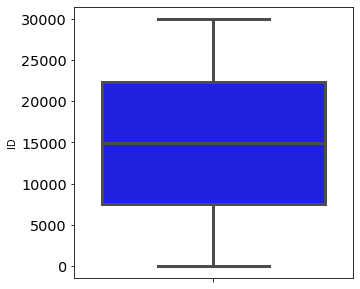

In [27]:
# Membuat boxplot untuk data pada kolom ID
plt.figure(figsize=(5, 5))
sns.boxplot(y=df["ID"], color='blue', orient='v')
plt.show()

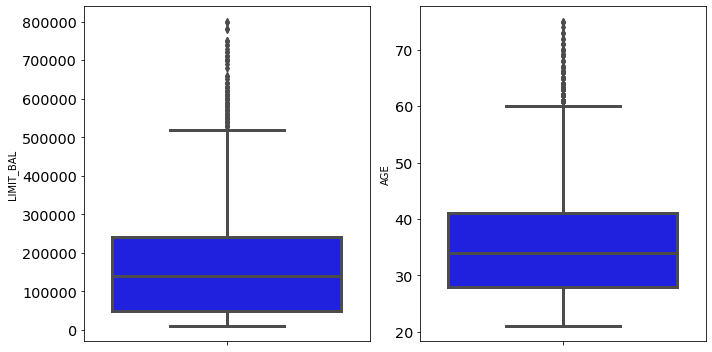

In [28]:
# Membuat boxplot untuk data pada kolom LIMIT_BAL, dan AGE
plt.figure(figsize=(10, 5))
for i in range(0, len(nums1)):
    plt.subplot(1, len(nums1), i+1)
    sns.boxplot(y=df[nums1[i]], color='blue', orient='v')
    plt.tight_layout()

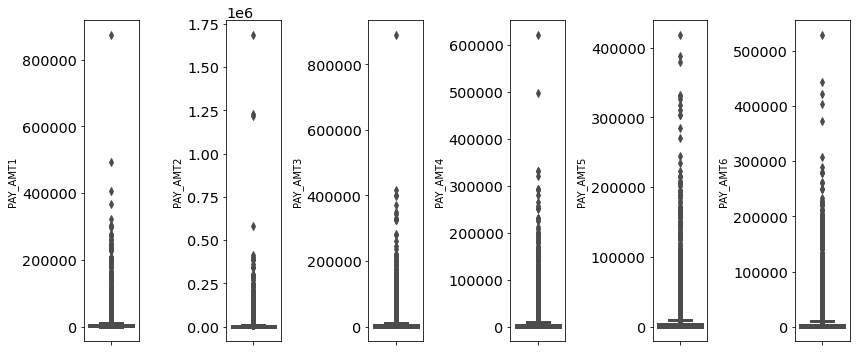

In [29]:
# Membuat boxplot untuk data pada kolom PAY_AMT1 sampai PAY_AMT6
plt.figure(figsize=(12, 5))
for i in range(0, len(pay_amt)):
    plt.subplot(1, len(pay_amt), i+1)
    sns.boxplot(y=df[pay_amt[i]], color='blue', orient='v')
    plt.tight_layout()

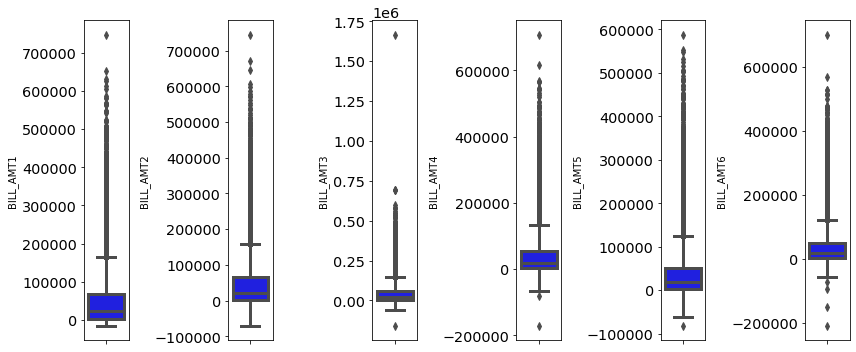

In [32]:
# Membuat boxplot untuk data pada kolom BILL_AMT1 sampai BILL_AMT6
plt.figure(figsize=(12, 5))
for i in range(0, len(bill_amt)):
    plt.subplot(1, len(bill_amt), i+1)
    sns.boxplot(y=df[bill_amt[i]], color='blue', orient='v')
    plt.tight_layout()

Hasil pengamatan :
* Terdapat banyak outlier pada semua kolom dengan tipe data numerikal (kecuali data pada kolom ID)
* Terlihat kolom tersebut distribusi skewed yang ditandai dengan lokasi box yang jauh dari daerah tengah sumbu Y

## Memeriksa Distribusi Data

C:\Users\Mizar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Mizar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


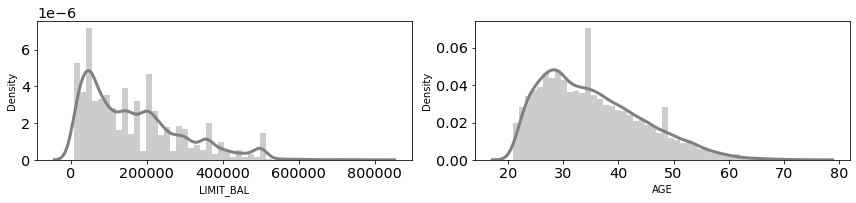

In [33]:
# Memeriksa distribusi data untuk data pada kolom LIMIT_BAL dan AGE
plt.figure(figsize=(12, 5))
for i in range(0, len(nums1)):
    plt.subplot(2, len(nums1), i+1)
    sns.distplot(df[nums1[i]], color='gray')
    plt.tight_layout()

In [34]:
df["LIMIT_BAL"].value_counts().reset_index().head(5)

,index,LIMIT_BAL
0,50000,2388
1,20000,1395
2,80000,1107
3,30000,1076
4,200000,1033


Limit dengan nasabah terbanyak : NTD 20.000, NTD 30.000, NTD 50.000, NTD 80.000, NTD 200.000

In [37]:
df["AGE"].value_counts().reset_index().sort_values('AGE')

,index,AGE
54,74,1
53,72,2
52,73,2
51,68,3
50,71,3
49,75,3
48,70,8
47,67,11
46,69,11
45,65,16


Nasabah bank ini paling banyak berusia 26 tahun, 27 tahun, 28 tahun, **29 tahun**, 30 tahun.

C:\Users\Mizar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Mizar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Mizar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

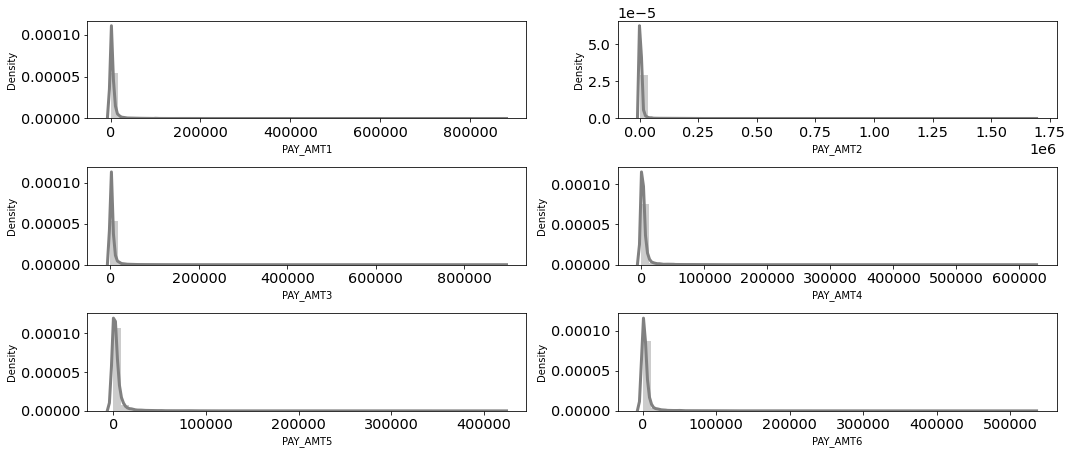

In [38]:
# Memeriksa distribusi data untuk data pada kolom PAY_AMT1 sampai PAY_AMT6
plt.figure(figsize=(15, 12))
for i in range(0, len(pay_amt)):
    plt.subplot(len(pay_amt),2, i+1)
    sns.distplot(df[pay_amt[i]], color='gray')
    plt.tight_layout()

C:\Users\Mizar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Mizar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Mizar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

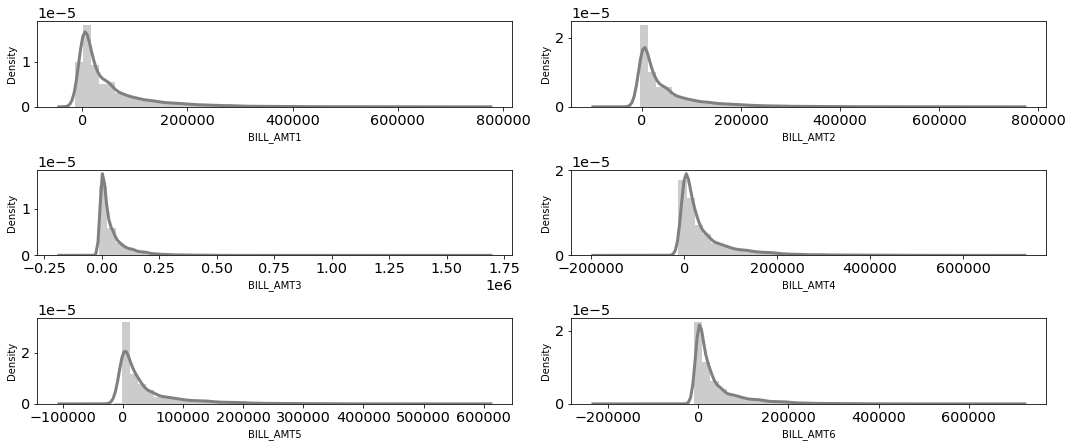

In [39]:
plt.figure(figsize=(15, 12))
for i in range(0, len(bill_amt)):
    plt.subplot(len(bill_amt),2, i+1)
    sns.distplot(df[bill_amt[i]], color='gray')
    plt.tight_layout()

C:\Users\Mizar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Mizar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Mizar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

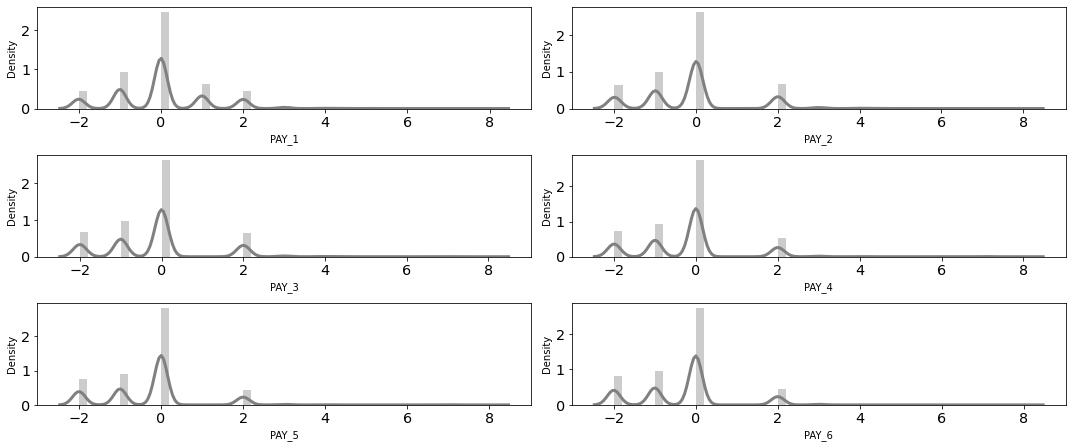

In [40]:
# Memeriksa distribusi data untuk data pada kolom PAY_1 sampai PAY_6
plt.figure(figsize=(15, 12))
for i in range(0, len(pay_delay)):
    plt.subplot(len(pay_delay),2, i+1)
    sns.distplot(df[pay_delay[i]], color='gray')
    plt.tight_layout()

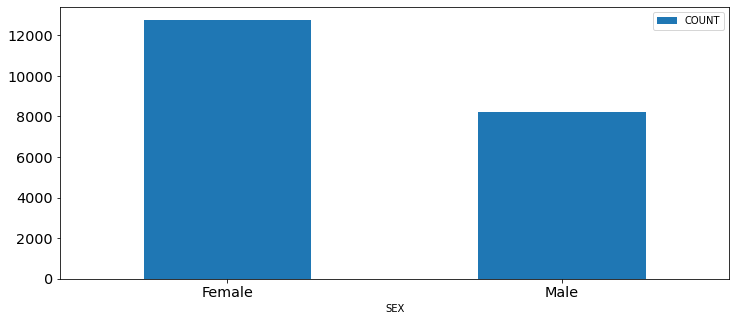

In [41]:
# Melihat persebaran data pada kolom SEX
df_value_sex.plot(x = "SEX", kind = "bar")
plt.xticks(rotation = 0)
plt.show()

<Figure size 720x720 with 0 Axes>

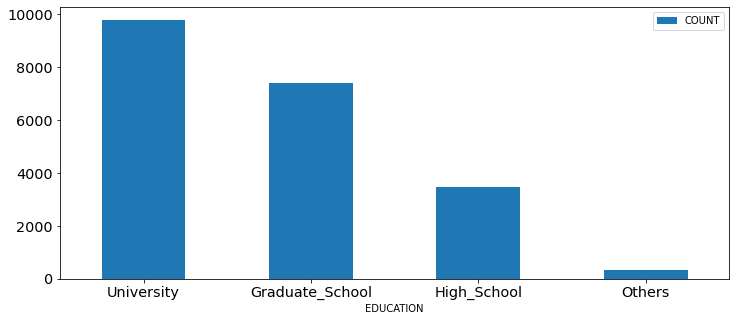

In [42]:
# Melihat persebaran data pada kolom EDUCATION
plt.figure(figsize=(10,10))
df_value_education.plot(x = "EDUCATION", kind = "bar")
plt.xticks(rotation = 0)
plt.show()

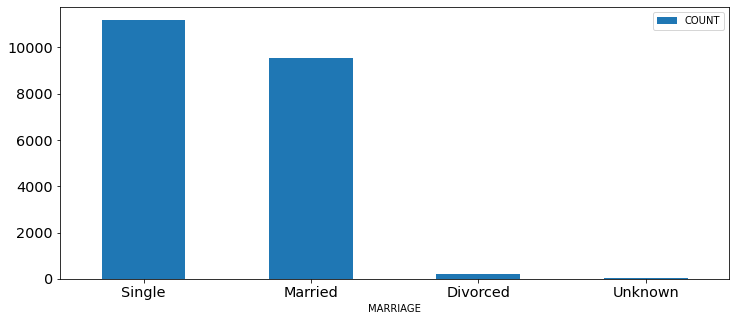

In [43]:
# Melihat persebaran data pada kolom EDUCATION
df_value_marriage.plot(x = "MARRIAGE", kind = "bar")
plt.xticks(rotation = 0)
plt.show()

# Multivariate Analysis

## Memeriksa Korelasi

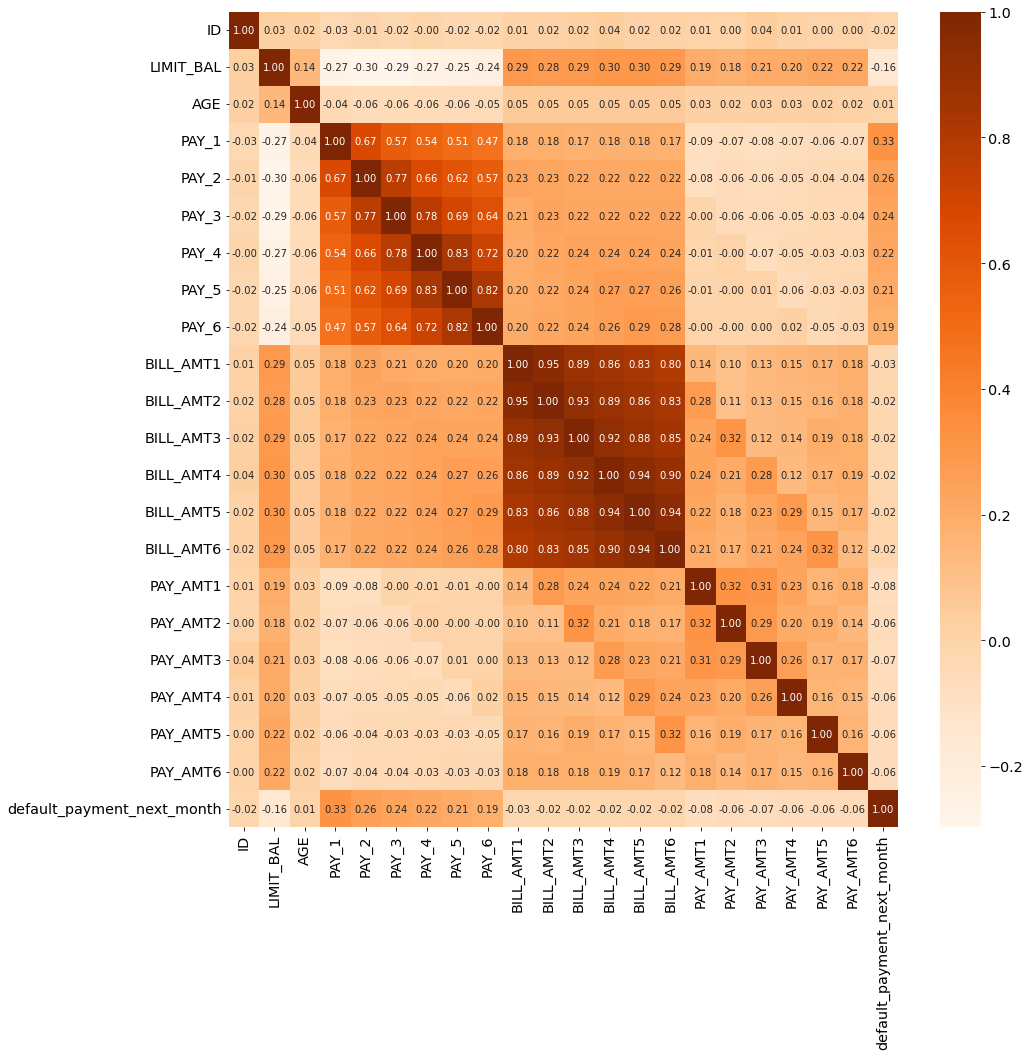

In [44]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), cmap='Oranges', annot=True, fmt='.2f')
plt.show()

Hasil pengamatan :
* Korelasi paling kuat terjadi antara kolom PAY_X dengan kolom PAY_X lainnya (X = 1,2,3,4,5,6) dan antara kolom BILL_AMTX dengan kolom BILL_AMTX lainnya (X = 1,2,3,4,5,6).
* Dari nilai korelasi antara BILL_AMT6 dengan BILL_AMT5, BILL_AMT5 dengan BILL_AMT4, BILL_AMT3 dengan BILL_AMT2, dan BILL_AMT2 dengan BILL_AMT1, didapat bahwa semakin besar jumlah tagihan kartu kredit nasabah pada bulan sebelumnya, semakin besar pula jumlah tagihan kartu kredit nasabah pada bulan berikutnya (misal jumlah tagihan pada bulan April besar, maka tagihan pada bulan Mei akan semakin besar). Begitu pula sebaliknya.
  * Hal ini dapat dipengaruhi oleh adanya bunga kartu kredit dan biaya keterlambatan pembayaran.
* Nilai korelasi antara PAY_6 dengan PAY_5 adalah 0.82, PAY_5 dengan PAY_4 berkorelasi sebesar 0.83, PAY_4 dengan PAY_3 berkorelasi sebesar 0.78, PAY_3 dengan PAY_2 berkorelasi sebesar 0.77, PAY_2 dengan PAY_1 berkorelasi sebesar 0.67.
  * Dari sini dapat dilihat bahwa hubungan antara repayment status seorang nasabah dari bulan satu ke bulan lainnya semakin lama cenderung semakin lemah (dari PAY_6 ke PAY_1).
  * Dari nilai-nilai korelasi ini didapat juga bahwa apabila di bulan sebelumnya nasabah menunggak pembayaran tagihan kartu kredit, maka di bulan berikutnya nasabah tersebut juga kemungkinan besar akan kembali menunggak. Begitu pula sebaliknya. Jika di bulan sebelumnya nasabah melakukan pembayaran tepat waktu / tidak menunggak, maka kemungkinan besar di bulan berikutnya nasabah juga tidak akan menunggak.
* Di antara kolom-kolom lainnya, kolom yang paling berkorelasi dengan variabel target adalah kolom PAY_1 yang kemudian diikuti dengan kolom PAY_2, PAY_3, PAY_4, PAY_5, dan PAY_6.
* Limit nasabah memiliki korelasi positif yang lemah (sampai dengan 0.3) dengan jumlah tagihan nasabah (BILL_AMT).
  * Ada kemungkinan semakin besar limit nasabah, semakin besar juga jumlah tagihannya. Begitu pula sebaliknya.
* Limit nasabah memiliki korelasi negatif yang lemah dengan repayment status (PAY_1 sampai PAY_6).
  * Ada kemungkinan semakin besar limit nasabah, semakin kecil nilai pada status repaymentnya. Begitu pula sebaliknya.

## Pairplot

<Figure size 1080x1080 with 0 Axes>

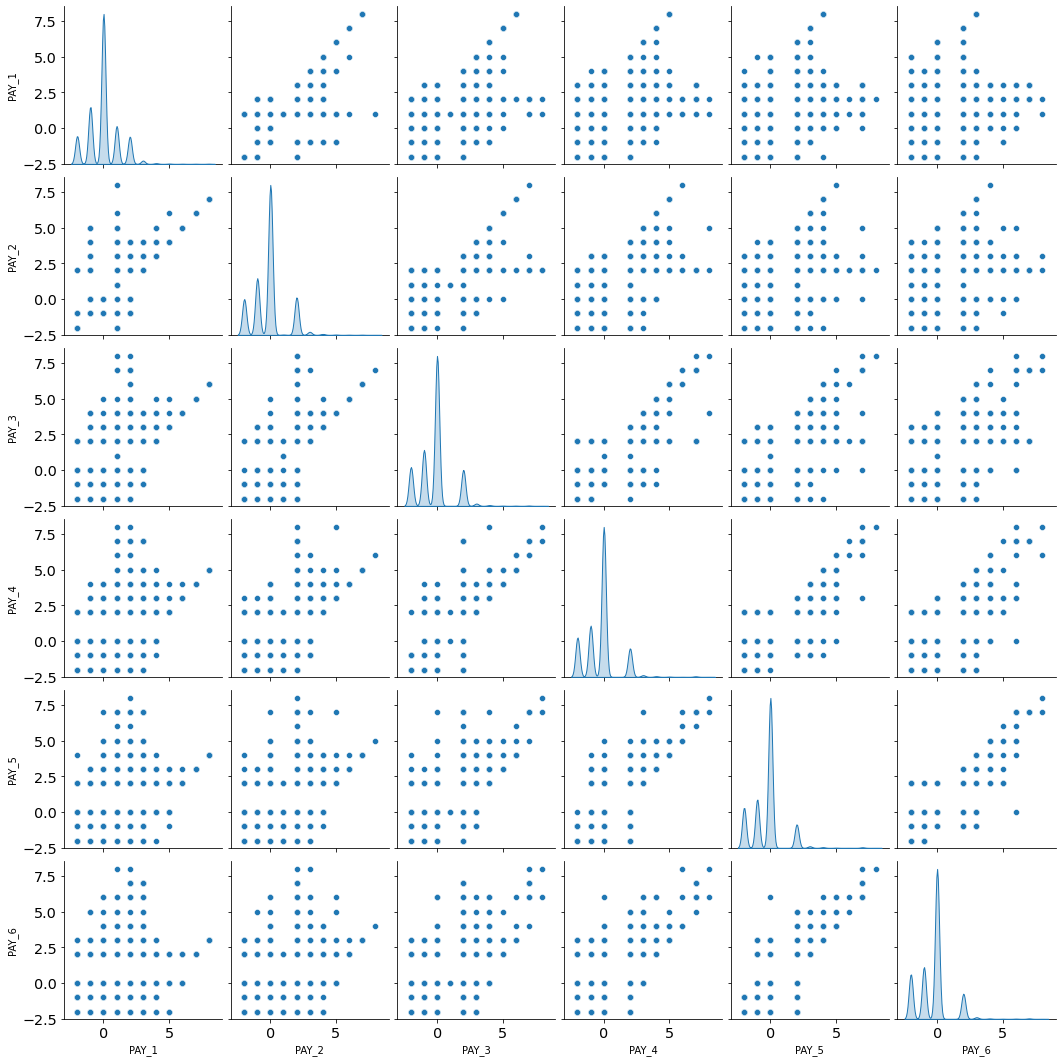

In [45]:
plt.figure(figsize=(15, 15))
sns.pairplot(df[pay_delay], diag_kind='kde')

<Figure size 1080x1080 with 0 Axes>

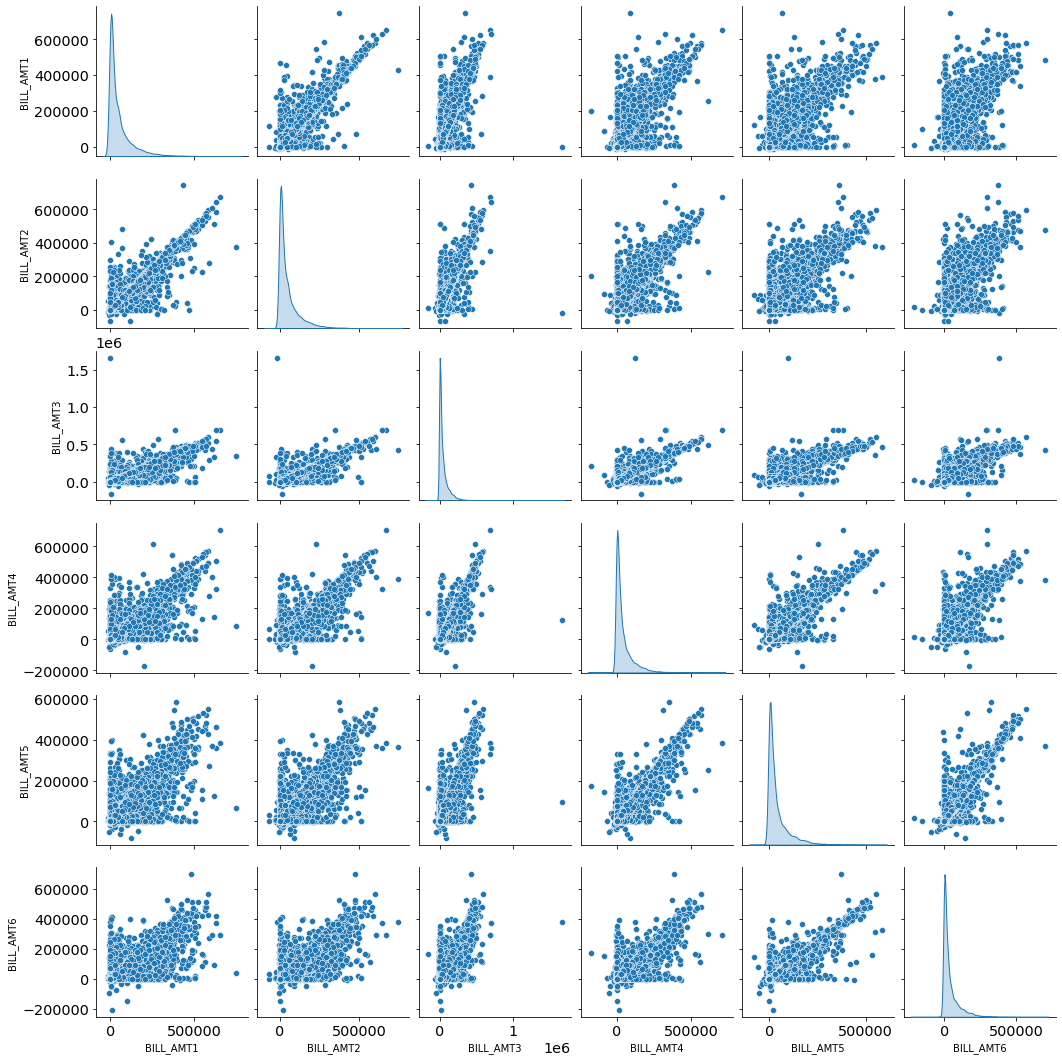

In [46]:
plt.figure(figsize=(15, 15))
sns.pairplot(df[bill_amt], diag_kind='kde')

## Penambahan Kolom Kategori Umur dan Limit

In [48]:
# kategori umur
def get_age_cat(age):
    if age >= 60:
        cat = "above 60"
    elif age >= 50:
        cat = "50s"
    elif age >= 40:
        cat = "40s"
    elif age >= 30:
        cat = "30s"
    elif age >= 20:
        cat = "20s"
    return cat

In [49]:
# kategori limit
def get_limit_cat(limit):
    if limit >= 600000:
        cat = "extremely high"
    elif limit >= 400000:
        cat = "high"
    elif limit >= 200000:
        cat = "medium"
    else:
        cat = "low"
    return cat

In [50]:
df1 = df

In [51]:
df1["age_cat"] = df1["AGE"].apply(lambda x : get_age_cat(x))
df1["limit_cat"] = df1["LIMIT_BAL"].apply(lambda x : get_limit_cat(x))

In [52]:
df1.sample(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,age_cat,limit_cat
18561,28936,460000,Female,Graduate_School,Single,34,-1,-1,-1,-1,...,10184,8869,23664,12659,5752,10192,7419,0,30s,high
16816,19938,230000,Female,Graduate_School,Married,39,1,-2,-1,-1,...,0,0,181,2680,0,0,0,1,30s,medium
19334,7338,230000,Female,Graduate_School,Married,36,-1,-1,2,-1,...,6006,9574,0,3660,3790,6006,5647,1,30s,medium
19676,10739,30000,Male,University,Single,26,-1,0,0,0,...,0,3000,3000,6000,780,0,0,0,20s,low
1006,22807,300000,Female,Graduate_School,Single,31,0,0,0,0,...,662,1009,1000,2700,658,662,0,0,30s,medium


## Analisis Lanjutan

In [55]:
df_default_count2 = df1[(df1["age_cat"] == "20s") & (df1["default_payment_next_month"] == 1)]
df_default_count2 = df_default_count2.groupby(["AGE","SEX","MARRIAGE","EDUCATION"]).agg({"LIMIT_BAL" : ["mean"], "ID" : ["count"]}).reset_index()
df_default_count2.columns = ["AGE", "SEX", "MARRIAGE", "EDUCATION", "mean_limit", "count"]
df_default_count2.sort_values("count",ascending = False).head(5)

,AGE,SEX,MARRIAGE,EDUCATION,mean_limit,count
31,24,Female,Single,University,85652.173913,69
21,23,Female,Single,University,63787.878788,66
45,25,Female,Single,University,94218.750000,64
95,29,Female,Single,Graduate_School,175087.719298,57
52,25,Male,Single,University,54807.692308,52


## Default Percentage untuk Masing-masing Gender

In [56]:
df_sex = df1.groupby(["SEX","default_payment_next_month"])["ID"].count().reset_index()

df_sex = pd.pivot_table(df_sex, index = ["SEX"], columns = ["default_payment_next_month"], values = ["ID"])
df_sex = df_sex.reset_index()
df_sex.columns = ['SEX','NON DEFAULT','DEFAULT']

df_sex["total"] = df_sex["NON DEFAULT"] + df_sex["DEFAULT"]
df_sex["dp_per_sex"] = df_sex["DEFAULT"] / df_sex["total"] * 100
df_sex["dp_per_total_default"] = df_sex["DEFAULT"] / 4645 * 100
df_sex["dp_per_all"] = df_sex["DEFAULT"] / 21000 * 100

df_sex

,SEX,NON DEFAULT,DEFAULT,total,dp_per_sex,dp_per_total_default,dp_per_all
0,Female,10097,2662,12759,20.863704,57.308934,12.676190
1,Male,6258,1983,8241,24.062614,42.691066,9.442857


(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

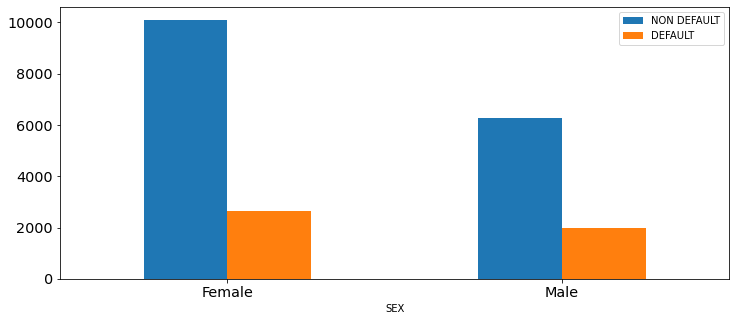

In [57]:
df_sex.plot(x = "SEX", y = ["NON DEFAULT","DEFAULT"],kind = "bar")
plt.xticks(rotation = 0)

Berdasarkan jenis kelamin, mayoritas nasabah yang default adalah perempuan yaitu sebanyak  57,31% (2662 orang) dari total nasabah yang default.

## Default Percentage untuk Masing-masing Kategori Usia

Catatan : 20s (20-29 tahun), 30s (30-39 tahun), 40s (40-49 tahun), 50s (50-59 tahun), above 60 (60 tahun ke atas)


In [60]:
df_age = df1.groupby(["age_cat","default_payment_next_month"])["ID"].count().reset_index()

df_age = pd.pivot_table(df_age, index = "age_cat", columns = "default_payment_next_month", values = "ID")
df_age = df_age.reset_index()
df_age.columns = ['age_cat','NON DEFAULT','DEFAULT']

df_age["total"] = df_age["NON DEFAULT"] + df_age["DEFAULT"]
df_age["dp_per_agecat"] = df_age["DEFAULT"] / df_age["total"] * 100
df_age["dp_per_total_default"] = df_age["DEFAULT"] / 4645 * 100
df_age["dp_per_all"] = df_age["DEFAULT"] / 21000 * 100

df_age

,age_cat,NON DEFAULT,DEFAULT,total,dp_per_agecat,dp_per_total_default,dp_per_all
0,20s,5159,1574,6733,23.377395,33.885899,7.495238
1,30s,6323,1571,7894,19.901191,33.821313,7.480952
2,40s,3475,1047,4522,23.153472,22.540366,4.985714
3,50s,1219,393,1612,24.379653,8.460710,1.871429
4,above 60,179,60,239,25.104603,1.291712,0.285714


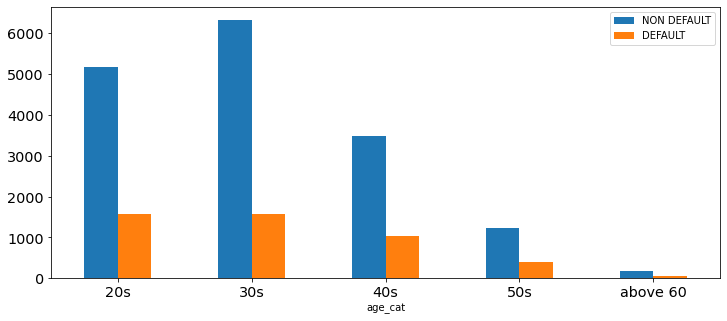

In [61]:
df_age.plot(x = "age_cat", y = ["NON DEFAULT","DEFAULT"], kind = "bar")
plt.xticks(rotation = 0)
plt.show()

Berdasarkan kategori usia, mayoritas nasabah yang default berusia 20-an tahun (33.89%) dan 30-an tahun (33.82%).

#### Analisis Lanjutan

In [63]:
# Menghitung banyak nasabah berumur 20an dan 30an yang default
df_age1 = df1[((df1["age_cat"] == "20s") | (df1["age_cat"] == "30s")) & (df1["default_payment_next_month"] == 1)]["AGE"].value_counts().reset_index()
df_age1.columns = ["AGE","DEFAULT"]

df_age1["dp_per_total_default"] = df_age1["DEFAULT"] / 4645 * 100
df_age1["dp_per_all"] = df_age1["DEFAULT"] / 21000 * 100

df_age1.sort_values("AGE",ascending = True, inplace = True)

df_age1

,AGE,DEFAULT,dp_per_total_default,dp_per_all
18,21,8,0.172228,0.038095
17,22,133,2.863294,0.633333
7,23,174,3.745963,0.828571
4,24,202,4.348762,0.961905
1,25,223,4.800861,1.061905
5,26,182,3.918192,0.866667
0,27,225,4.843918,1.071429
3,28,206,4.434876,0.980952
2,29,221,4.757804,1.052381
6,30,178,3.832078,0.847619


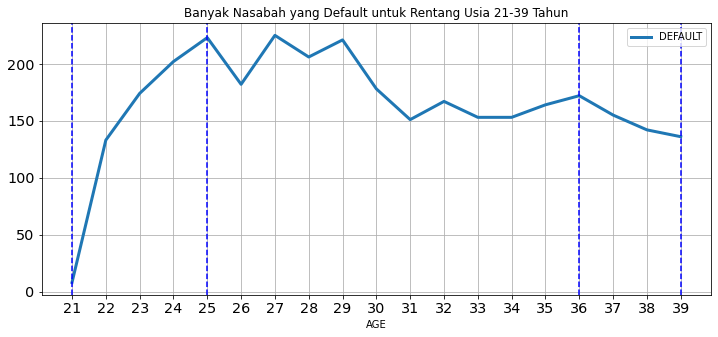

In [64]:
df_age1.plot(x = "AGE", y = "DEFAULT", kind = "line", grid = True)
plt.xticks(range(21, 40, 1))
plt.title("Banyak Nasabah yang Default untuk Rentang Usia 21-39 Tahun")
plt.axvline(x=21, color='blue', ls='--', lw=1.5)
plt.axvline(x=25, color='blue', ls='--', lw=1.5)
plt.axvline(x=36, color='blue', ls='--', lw=1.5)
plt.axvline(x=39, color='blue', ls='--', lw=1.5)
plt.legend(loc = 1)
plt.show()

Hasil pengamatan :
* Nasabah yang paling banyak default memiliki usia 25, 27, dan 29 tahun.
* Untuk nasabah dalam rentang umur 21-25 tahun (early to mid 20s), semakin tua usianya, nasabah semakin cenderung untuk default.
* Untuk nasabah dalam rentang umur 36-39 tahun (mid to late 30s), semakin tua usianya, nasabah semakin tidak cenderung untuk default.

## Default Percentage untuk Masing-masing Kategori Pendidikan

In [66]:
df_edu = df1.groupby(["EDUCATION","default_payment_next_month"])["ID"].count().reset_index()

df_edu = pd.pivot_table(df_edu, index = ["EDUCATION"], columns = ["default_payment_next_month"], values = ["ID"])
df_edu = df_edu.reset_index()
df_edu.columns = ['EDUCATION','NON DEFAULT','DEFAULT']

df_edu["total"] = df_edu["NON DEFAULT"] + df_edu["DEFAULT"]
df_edu["dp_per_education"] = df_edu["DEFAULT"] / df_edu["total"] * 100
df_edu["dp_per_total_default"] = df_edu["DEFAULT"] / 4645 * 100
df_edu["dp_per_all"] = df_edu["DEFAULT"] / 21000 * 100

df_edu

,EDUCATION,NON DEFAULT,DEFAULT,total,dp_per_education,dp_per_total_default,dp_per_all
0,Graduate_School,5982,1433,7415,19.325691,30.850377,6.823810
1,High_School,2618,849,3467,24.488030,18.277718,4.042857
2,Others,311,18,329,5.471125,0.387513,0.085714
3,University,7444,2345,9789,23.955460,50.484392,11.166667


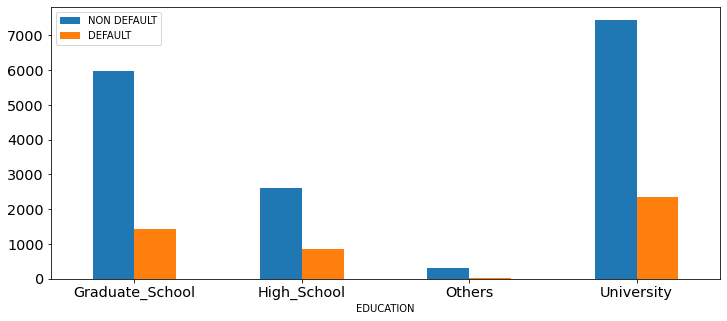

In [67]:
df_edu.plot(x = "EDUCATION", y = ["NON DEFAULT","DEFAULT"], kind = "bar")
plt.xticks(rotation = 0)
plt.show()

Berdasarkan kategori pendidikan, mayoritas nasabah yang default adalah lulusan universitas (50.48%).

## Default Percentage untuk Masing-masing Status Pernikahan

In [68]:
df_marriage = df.groupby(["MARRIAGE","default_payment_next_month"])["ID"].count().reset_index()

df_marriage = pd.pivot_table(df_marriage, index = ["MARRIAGE"], columns = ["default_payment_next_month"], values = ["ID"])
df_marriage = df_marriage.reset_index()
df_marriage.columns = ['MARRIAGE','NON DEFAULT','DEFAULT']

df_marriage["total"] = df_marriage["NON DEFAULT"] + df_marriage["DEFAULT"]
df_marriage["dp_per_marriage"] = df_marriage["DEFAULT"] / df_marriage["total"] * 100
df_marriage["dp_per_total_default"] = df_marriage["DEFAULT"] / 4645 * 100
df_marriage["dp_per_all"] = df_marriage["DEFAULT"] / 21000 * 100

df_marriage

,MARRIAGE,NON DEFAULT,DEFAULT,total,dp_per_marriage,dp_per_total_default,dp_per_all
0,Divorced,156,63,219,28.767123,1.356297,0.300000
1,Married,7343,2218,9561,23.198410,47.750269,10.561905
2,Single,8822,2362,11184,21.119456,50.850377,11.247619
3,Unknown,34,2,36,5.555556,0.043057,0.009524


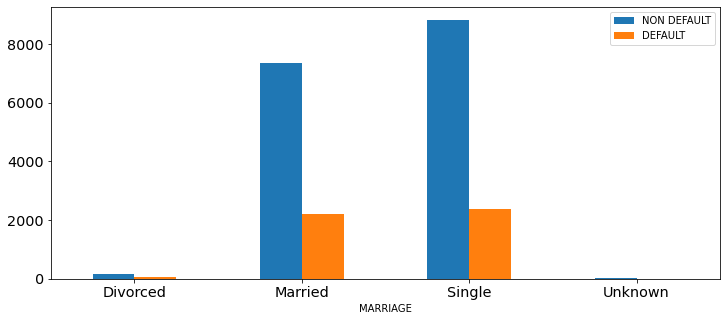

In [69]:
df_marriage.plot(x = "MARRIAGE", y = ["NON DEFAULT","DEFAULT"], kind = "bar")
plt.xticks(rotation = 0)
plt.show()

Berdasarkan status pernikahan, mayoritas nasabah yang default adalah nasabah dengan status single (50.85%) dan nasabah yang sudah menikah (47.75%).

## Default Percentage untuk Masing-masing Kategori Limit

In [70]:
df_limit = df.groupby(["limit_cat","default_payment_next_month"])["ID"].count().reset_index()

df_limit = pd.pivot_table(df_limit, index = "limit_cat", columns = "default_payment_next_month", values = "ID")
df_limit = df_limit.reset_index()
df_limit.columns = ["limit_cat","NON DEFAULT","DEFAULT"]

df_limit["total"] = df_limit["NON DEFAULT"] + df_limit["DEFAULT"]
df_limit["dp_per_cat"] = df_limit["DEFAULT"] / df_limit["total"] * 100
df_limit["dp_per_total_default"] = df_limit["DEFAULT"] / 4645 * 100
df_limit["dp_per_all"] = df_limit["DEFAULT"] / 21000 * 100

df_limit

,limit_cat,NON DEFAULT,DEFAULT,total,dp_per_cat,dp_per_total_default,dp_per_all
0,extremely high,50,7,57,12.280702,0.150700,0.033333
1,high,1217,157,1374,11.426492,3.379978,0.747619
2,low,9699,3488,13187,26.450292,75.091496,16.609524
3,medium,5389,993,6382,15.559386,21.377826,4.728571


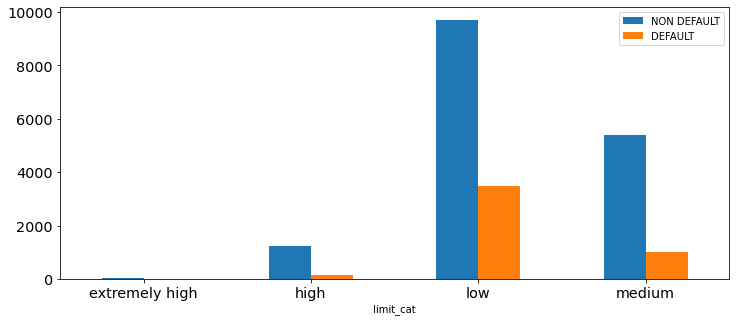

In [71]:
df_limit.plot(x = "limit_cat", y = ["NON DEFAULT","DEFAULT"], kind = "bar")
plt.xticks(rotation = 0)
plt.show()

Berdasarkan kategori limit, mayoritas nasabah yang default memiliki limit kartu kredit di bawah NTD 200000 (kategori low).

## Default Percentage untuk Repayment Status di September 2005

In [72]:
df_pay_1 = df.groupby(["PAY_1","default_payment_next_month"])["ID"].count().reset_index()

df_pay_1 = pd.pivot_table(df_pay_1, index = "PAY_1", columns = "default_payment_next_month", values = "ID")
df_pay_1 = df_pay_1.reset_index()
df_pay_1.columns = ["PAY_1","NON DEFAULT","DEFAULT"]

df_pay_1["total"] = df_pay_1["NON DEFAULT"] + df_pay_1["DEFAULT"]
df_pay_1["dp_per_total_default"] = df_pay_1["DEFAULT"] / 4645 * 100
df_pay_1["dp_per_all"] = df_pay_1["DEFAULT"] / 21000 * 100

df_pay_1

,PAY_1,NON DEFAULT,DEFAULT,total,dp_per_total_default,dp_per_all
0,-2,1676,247,1923,5.317546,1.176190
1,-1,3266,671,3937,14.445640,3.195238
2,0,9010,1314,10324,28.288482,6.257143
3,1,1728,880,2608,18.945102,4.190476
4,2,587,1296,1883,27.900969,6.171429
5,3,52,179,231,3.853606,0.852381
6,4,16,31,47,0.667384,0.147619
7,5,9,10,19,0.215285,0.047619
8,6,4,5,9,0.107643,0.023810
9,7,2,6,8,0.129171,0.028571


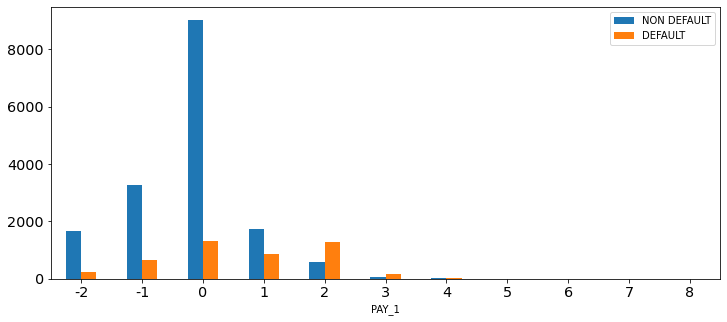

In [73]:
df_pay_1.plot(x = "PAY_1", y = ["NON DEFAULT","DEFAULT"], kind = "bar")
plt.xticks(rotation = 0)
plt.show()

Berdasarkan repayment status di September 2005, mayoritas nasabah yang default berasal memiliki status 0 (28.29%) dan 2 (27.9%).

## Default Percentage untuk Repayment Status di Agustus 2005

In [74]:
df_pay_2 = df.groupby(["PAY_2","default_payment_next_month"])["ID"].count().reset_index()

df_pay_2 = pd.pivot_table(df_pay_2, index = "PAY_2", columns = "default_payment_next_month", values = "ID")
df_pay_2 = df_pay_2.reset_index()
df_pay_2.columns = ["PAY_2","NON DEFAULT","DEFAULT"]

df_pay_2["total"] = df_pay_2["NON DEFAULT"] + df_pay_2["DEFAULT"]
df_pay_2["dp_per_total_default"] = df_pay_2["DEFAULT"] / 4645 * 100
df_pay_2["dp_per_all"] = df_pay_2["DEFAULT"] / 21000 * 100

df_pay_2

,PAY_2,NON DEFAULT,DEFAULT,total,dp_per_total_default,dp_per_all
0,-2,2161.0,482.0,2643.0,10.376749,2.295238
1,-1,3510.0,664.0,4174.0,14.294941,3.161905
2,0,9286.0,1757.0,11043.0,37.825619,8.366667
3,1,20.0,3.0,23.0,0.064586,0.014286
4,2,1241.0,1535.0,2776.0,33.046286,7.309524
5,3,86.0,143.0,229.0,3.078579,0.680952
6,4,34.0,35.0,69.0,0.753498,0.166667
7,5,8.0,13.0,21.0,0.279871,0.061905
8,6,3.0,7.0,10.0,0.150700,0.033333
9,7,5.0,6.0,11.0,0.129171,0.028571


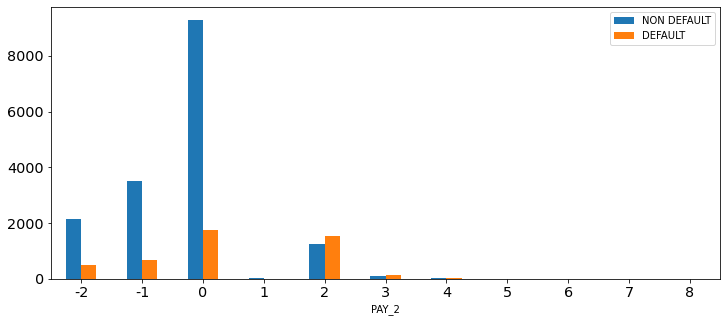

In [75]:
df_pay_2.plot(x = "PAY_2", y = ["NON DEFAULT","DEFAULT"], kind = "bar")
plt.xticks(rotation = 0)
plt.show()

Berdasarkan repayment status di Agustus 2005, mayoritas nasabah yang default berasal memiliki status 0 (37.83%) dan 2 (33.05%).

## Default Percentage untuk Repayment Status di Juli 2005

In [76]:
df_pay_3 = df.groupby(["PAY_3","default_payment_next_month"])["ID"].count().reset_index()

df_pay_3 = pd.pivot_table(df_pay_3, index = "PAY_3", columns = "default_payment_next_month", values = "ID")
df_pay_3 = df_pay_3.reset_index()
df_pay_3.columns = ["PAY_3","NON DEFAULT","DEFAULT"]

df_pay_3["total"] = df_pay_3["NON DEFAULT"] + df_pay_3["DEFAULT"]
df_pay_3["dp_per_total_default"] = df_pay_3["DEFAULT"] / 4645 * 100
df_pay_3["dp_per_all"] = df_pay_3["DEFAULT"] / 21000 * 100

df_pay_3

,PAY_3,NON DEFAULT,DEFAULT,total,dp_per_total_default,dp_per_all
0,-2,2346.0,522.0,2868.0,11.237890,2.485714
1,-1,3465.0,660.0,4125.0,14.208827,3.142857
2,0,9138.0,1918.0,11056.0,41.291712,9.133333
3,1,2.0,NaN,NaN,NaN,NaN
4,2,1292.0,1378.0,2670.0,29.666308,6.561905
5,3,74.0,99.0,173.0,2.131324,0.471429
6,4,21.0,34.0,55.0,0.731970,0.161905
7,5,5.0,9.0,14.0,0.193757,0.042857
8,6,6.0,7.0,13.0,0.150700,0.033333
9,7,5.0,17.0,22.0,0.365985,0.080952


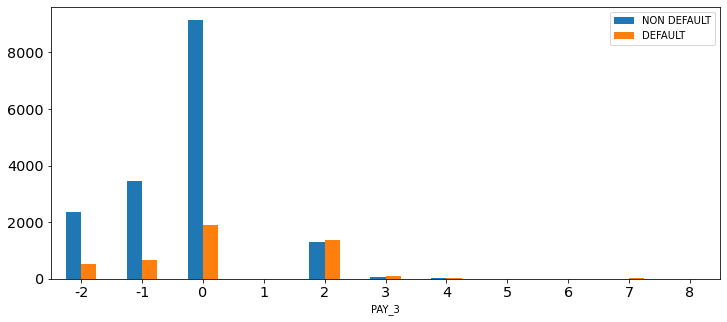

In [77]:
df_pay_3.plot(x = "PAY_3", y = ["NON DEFAULT","DEFAULT"], kind = "bar")
plt.xticks(rotation = 0)
plt.show()

Berdasarkan repayment status di Juli 2005, mayoritas nasabah yang default berasal memiliki status 0 (41.29%) dan 2 (29.67%).

## Default Percentage untuk Repayment Status di Juni 2005

In [78]:
df_pay_4 = df.groupby(["PAY_4","default_payment_next_month"])["ID"].count().reset_index()

df_pay_4 = pd.pivot_table(df_pay_4, index = "PAY_4", columns = "default_payment_next_month", values = "ID")
df_pay_4 = df_pay_4.reset_index()
df_pay_4.columns = ["PAY_4","NON DEFAULT","DEFAULT"]

df_pay_4["total"] = df_pay_4["NON DEFAULT"] + df_pay_4["DEFAULT"]
df_pay_4["dp_per_total_default"] = df_pay_4["DEFAULT"] / 4645 * 100
df_pay_4["dp_per_all"] = df_pay_4["DEFAULT"] / 21000 * 100

df_pay_4

,PAY_4,NON DEFAULT,DEFAULT,total,dp_per_total_default,dp_per_all
0,-2,2471,576,3047,12.400431,2.742857
1,-1,3311,638,3949,13.735199,3.038095
2,0,9436,2106,11542,45.339074,10.028571
3,2,1051,1157,2208,24.908504,5.509524
4,3,51,84,135,1.808396,0.400000
5,4,15,36,51,0.775027,0.171429
6,5,9,10,19,0.215285,0.047619
7,6,2,2,4,0.043057,0.009524
8,7,8,35,43,0.753498,0.166667
9,8,1,1,2,0.021529,0.004762


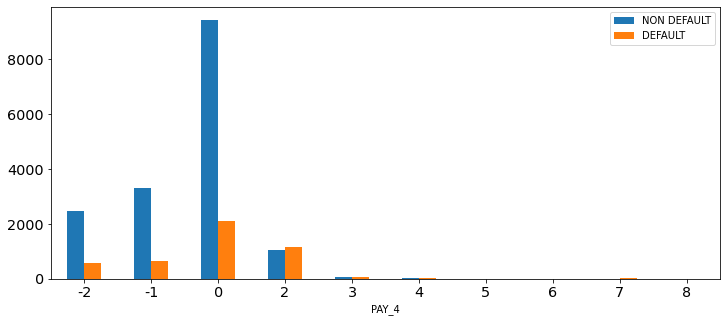

In [79]:
df_pay_4.plot(x = "PAY_4", y = ["NON DEFAULT","DEFAULT"], kind = "bar")
plt.xticks(rotation = 0)
plt.show()

Berdasarkan repayment status di Juni 2005, mayoritas nasabah yang default berasal memiliki status 0 (45.34%) dan 2 (24.9%).

## Default Percentage untuk Repayment Status di Mei 2005

In [80]:
df_pay_5 = df.groupby(["PAY_5","default_payment_next_month"])["ID"].count().reset_index()

df_pay_5 = pd.pivot_table(df_pay_5, index = "PAY_5", columns = "default_payment_next_month", values = "ID")
df_pay_5 = df_pay_5.reset_index()
df_pay_5.columns = ["PAY_5","NON DEFAULT","DEFAULT"]

df_pay_5["total"] = df_pay_5["NON DEFAULT"] + df_pay_5["DEFAULT"]
df_pay_5["dp_per_total_default"] = df_pay_5["DEFAULT"] / 4645 * 100
df_pay_5["dp_per_all"] = df_pay_5["DEFAULT"] / 21000 * 100

df_pay_5

,PAY_5,NON DEFAULT,DEFAULT,total,dp_per_total_default,dp_per_all
0,-2,2574.0,619.0,3193.0,13.326157,2.947619
1,-1,3207.0,633.0,3840.0,13.627557,3.014286
2,0,9642.0,2210.0,11852.0,47.578041,10.523810
3,2,850.0,1019.0,1869.0,21.937567,4.852381
4,3,48.0,84.0,132.0,1.808396,0.400000
5,4,21.0,32.0,53.0,0.688913,0.152381
6,5,4.0,9.0,13.0,0.193757,0.042857
7,6,1.0,1.0,2.0,0.021529,0.004762
8,7,8.0,37.0,45.0,0.796555,0.176190
9,8,NaN,1.0,NaN,0.021529,0.004762


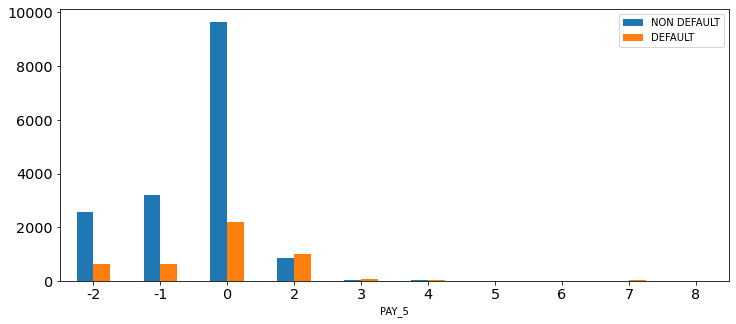

In [81]:
df_pay_5.plot(x = "PAY_5", y = ["NON DEFAULT","DEFAULT"], kind = "bar")
plt.xticks(rotation = 0)
plt.show()

Berdasarkan repayment status di Mei 2005, mayoritas nasabah yang default berasal memiliki status 0 (47.58%) dan 2 (21.94%).

## Default Percentage untuk Repayment Status di April 2005

In [82]:
df_pay_6 = df.groupby(["PAY_6","default_payment_next_month"])["ID"].count().reset_index()

df_pay_6 = pd.pivot_table(df_pay_6, index = "PAY_6", columns = "default_payment_next_month", values = "ID")
df_pay_6 = df_pay_6.reset_index()
df_pay_6.columns = ["PAY_6","NON DEFAULT","DEFAULT"]

df_pay_6["total"] = df_pay_6["NON DEFAULT"] + df_pay_6["DEFAULT"]
df_pay_6["dp_per_total_default"] = df_pay_6["DEFAULT"] / 4645 * 100
df_pay_6["dp_per_all"] = df_pay_6["DEFAULT"] / 21000 * 100

df_pay_6

,PAY_6,NON DEFAULT,DEFAULT,total,dp_per_total_default,dp_per_all
0,-2,2758.0,669.0,3427.0,14.402583,3.185714
1,-1,3269.0,701.0,3970.0,15.091496,3.338095
2,0,9303.0,2147.0,11450.0,46.221744,10.223810
3,2,959.0,975.0,1934.0,20.990312,4.642857
4,3,43.0,87.0,130.0,1.872982,0.414286
5,4,10.0,20.0,30.0,0.430571,0.095238
6,5,4.0,4.0,8.0,0.086114,0.019048
7,6,3.0,12.0,15.0,0.258342,0.057143
8,7,6.0,28.0,34.0,0.602799,0.133333
9,8,NaN,2.0,NaN,0.043057,0.009524


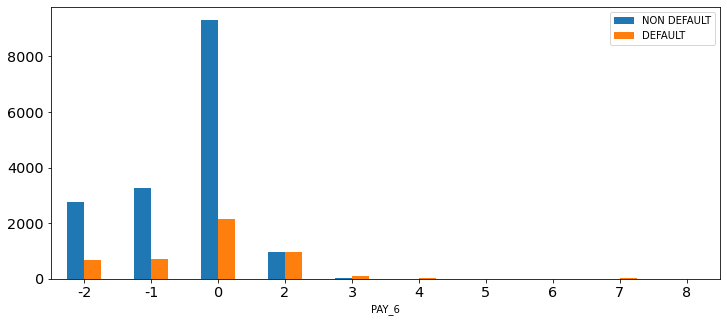

In [83]:
df_pay_6.plot(x = "PAY_6", y = ["NON DEFAULT","DEFAULT"], kind = "bar")
plt.xticks(rotation = 0)
plt.show()

Berdasarkan repayment status di April 2005, mayoritas nasabah yang default berasal memiliki status 0 (46.22%) dan 2 (20.99%).

## Hubungan Status Pernikahan dan Limit Kartu Kredit

In [84]:
df_marriage1 = round(df1.groupby("MARRIAGE").agg({"LIMIT_BAL" : ["mean","median"]}).reset_index(),2)
df_marriage1.columns = ["marriage", "mean_limit", "median_limit"]
df_marriage1

,marriage,mean_limit,median_limit
0,Divorced,96255.71,50000.0
1,Married,182155.84,160000.0
2,Single,155943.10,130000.0
3,Unknown,132500.00,115000.0


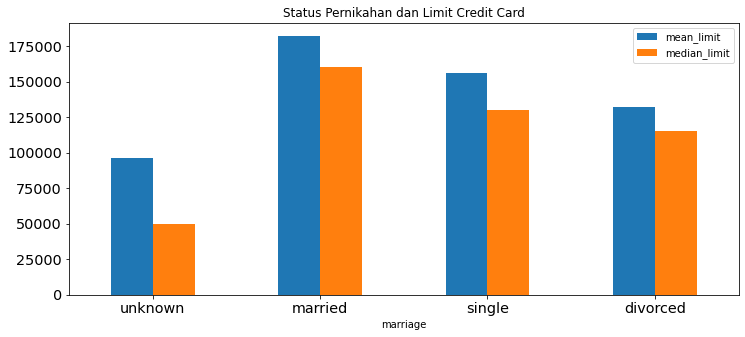

In [85]:
df_marriage1.plot(x = "marriage", kind = "bar")
plt.xticks([0,1,2,3],["unknown","married","single","divorced"],rotation = 0)
plt.title("Status Pernikahan dan Limit Credit Card")
plt.show()

Nasabah yang memiliki limit kartu kredit paling tinggi adalah nasabah yang sudah menikah. Hal ini masuk akal mengingat bertambahnya kebutuhan hidup setelah menikah.

## Hubungan Pendidikan dan Limit Kartu Kredit

In [86]:
# Menghitung mean dan median limit untuk masing-masing kategori pendidikan
df_edu1 = round(df1.groupby("EDUCATION").agg({"LIMIT_BAL" : ["mean","median"]}).reset_index(),2)
df_edu1.columns = ["EDUCATION", "mean_limit", "median_limit"]

df_edu1['EDUCATION'] = df_edu1['EDUCATION'].replace("Graduate_School", 1)
df_edu1['EDUCATION'] = df_edu1['EDUCATION'].replace("University", 2)
df_edu1['EDUCATION'] = df_edu1['EDUCATION'].replace("High_School", 3)
df_edu1['EDUCATION'] = df_edu1['EDUCATION'].replace("Others", 4)

df_edu1 = df_edu1.sort_values("EDUCATION",ascending = True)
df_edu1 = df_edu1.reset_index()
df_edu1.drop(["index"],axis = 1)

,EDUCATION,mean_limit,median_limit
0,1,212024.28,200000.0
1,2,147140.26,110000.0
2,3,126653.50,80000.0
3,4,182024.32,170000.0


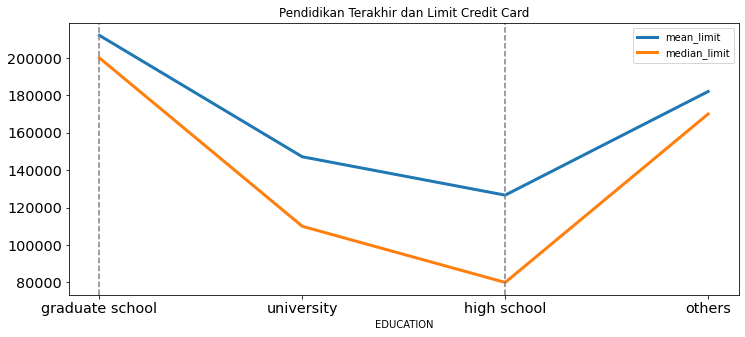

In [87]:
df_edu1.plot(x = "EDUCATION", y = ["mean_limit","median_limit"],kind = "line")
plt.xticks([1,2,3,4],["graduate school","university","high school","others"],rotation = 0)
plt.legend(loc = 1)
plt.axvline(x=1, color='gray', ls='--', lw=1.5)
plt.axvline(x=3, color='gray', ls='--', lw=1.5)
plt.title("Pendidikan Terakhir dan Limit Credit Card")
plt.show()

Semakin rendah tingkat pendidikan terakhir nasabah bank, semakin rendah juga limit kartu kredit nasabah tersebut.

## Hubungan Usia dan Limit Kartu Kredit

In [88]:
df_age1 = round(df1.groupby("age_cat").agg({"LIMIT_BAL" : ["mean","median"]}).reset_index(),1)
df_age1.columns = ["age_cat", "mean_limit", "median_limit"]
df_age1

,age_cat,mean_limit,median_limit
0,20s,124684.4,90000.0
1,30s,196428.9,180000.0
2,40s,180477.6,160000.0
3,50s,161563.3,110000.0
4,above 60,187615.1,170000.0


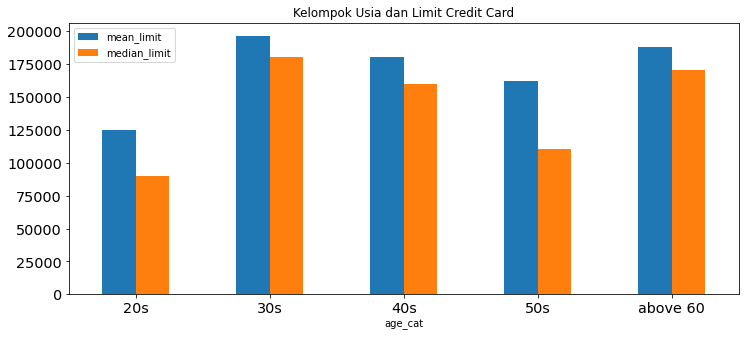

In [89]:
df_age1.plot(x = "age_cat", kind = "bar")
plt.xticks(rotation = 0)
plt.title("Kelompok Usia dan Limit Credit Card")
plt.show()

Nasabah berumur 30an tahun memiliki limit paling tinggi diantara nasabah yang lainnya. Urutan kedua adalah nasabah berumur di atas 60 tahun. Sementara urutan ketiga adalah nasabah berumur 40an tahun.

### Analisis Lanjutan 1

In [90]:
# Menghitung mean dan median limit nasabah berumur 31-39 tahun
df_30s_limit = round(df1[df1["age_cat"] == "30s"].groupby("AGE").agg({"LIMIT_BAL" : ["mean","median"]}).reset_index(),1)
df_30s_limit.columns = ["AGE", "mean_limit", "median_limit"]
df_30s_limit

,AGE,mean_limit,median_limit
0,30,187232.5,180000.0
1,31,195406.1,180000.0
2,32,196009.6,180000.0
3,33,194650.3,180000.0
4,34,197746.7,180000.0
5,35,199362.2,180000.0
6,36,197557.3,180000.0
7,37,200785.9,180000.0
8,38,192405.4,180000.0
9,39,206666.7,190000.0


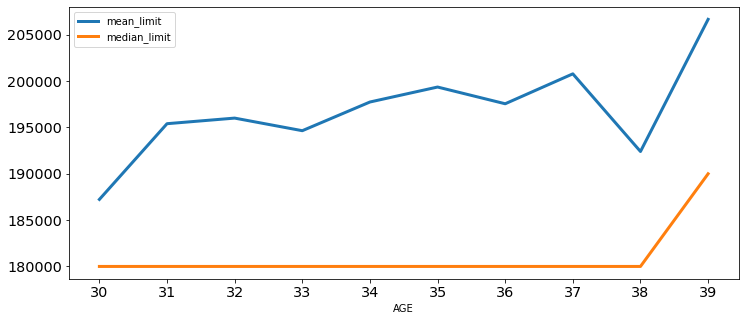

In [91]:
df_30s_limit.plot(x = "AGE",kind = "line")
plt.xticks(range(30, 40, 1),rotation = 0)
plt.show()

## Analisis Lanjutan 2

In [92]:
# Menghitung mean dan median limit nasabah berumur di atas 60 tahun
df_above60_limit = round(df1[df1["age_cat"] == "above 60"].groupby("AGE").agg({"LIMIT_BAL" : ["mean","median"]}).reset_index(),1)
df_above60_limit.columns = ["AGE", "mean_limit", "median_limit"]
df_above60_limit

,AGE,mean_limit,median_limit
0,60,135294.1,100000.0
1,61,184500.0,150000.0
2,62,147692.3,140000.0
3,63,214074.1,180000.0
4,64,245294.1,200000.0
5,65,207500.0,220000.0
6,66,228333.3,210000.0
7,67,183636.4,200000.0
8,68,220000.0,200000.0
9,69,288181.8,200000.0


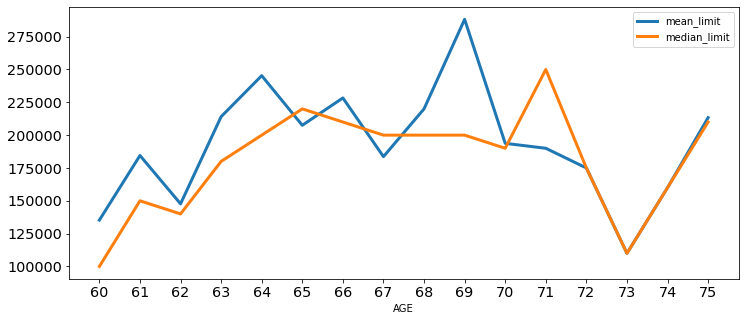

In [93]:
df_above60_limit.plot(x = "AGE",kind = "line")
plt.xticks(range(60, 76, 1),rotation = 0)
plt.show()

### Analisis Lanjutan 3

In [94]:
# Menghitung mean dan median limit nasabah berumur 41-49 tahun
df_40s_limit = round(df1[df1["age_cat"] == "40s"].groupby("AGE").agg({"LIMIT_BAL" : ["mean","median"]}).reset_index(),1)
df_40s_limit.columns = ["AGE", "mean_limit", "median_limit"]
df_40s_limit

,AGE,mean_limit,median_limit
0,40,186328.9,170000.0
1,41,185184.6,160000.0
2,42,191995.8,170000.0
3,43,179021.3,150000.0
4,44,189322.4,170000.0
5,45,172284.4,150000.0
6,46,177441.7,150000.0
7,47,163836.9,130000.0
8,48,166381.8,140000.0
9,49,176158.7,130000.0


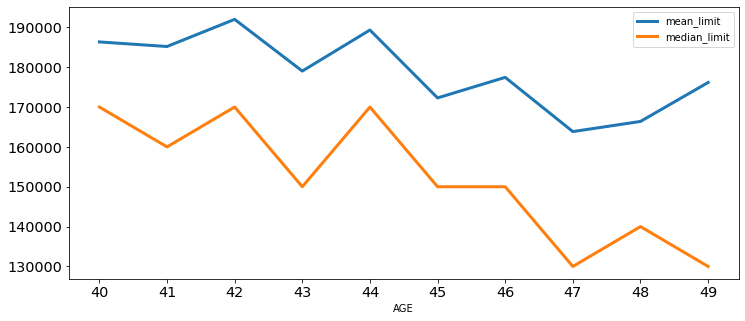

In [95]:
df_40s_limit.plot(x = "AGE",kind = "line")
plt.xticks(range(40, 50, 1),rotation = 0)
plt.show()

Dilihat dari mediannya, untuk nasabah berumur 40-49 tahun, semakin tua usianya, limit kartu kreditnya cenderung mengecil. (Trend majornya menurun)

## Hubungan Jenis Kelamin dan Limit Kartu Kredit

In [96]:
df_sex1 = round(df1.groupby("SEX").agg({"LIMIT_BAL" : ["mean","median"]}).reset_index(),1)
df_sex1.columns = ["SEX", "mean_limit", "median_limit"]
df_sex1

,SEX,mean_limit,median_limit
0,Female,170291.2,150000.0
1,Male,162451.6,130000.0


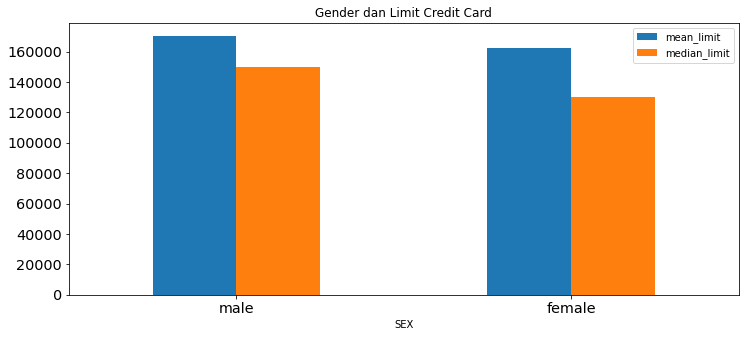

In [97]:
df_sex1.plot(x = "SEX", kind = "bar")
plt.xticks([0,1],["male","female"],rotation = 0)
plt.title("Gender dan Limit Credit Card")
plt.show()

Nasabah perempuan memiliki limit kartu kredit yang lebih tinggi daripada nasabah laki-laki.

## Hubungan PAY_1 dan Limit Kartu Kredit

In [98]:
df_pay1 = round(df1.groupby("PAY_1").agg({"LIMIT_BAL" : ["mean","median"]}).reset_index(),2)
df_pay1.columns = ["PAY_1", "mean_limit", "median_limit"]
df_pay1

,PAY_1,mean_limit,median_limit
0,-2,249199.17,230000.0
1,-1,206258.57,200000.0
2,0,154739.80,120000.0
3,1,148274.54,120000.0
4,2,111293.68,80000.0
5,3,79047.62,50000.0
6,4,83829.79,50000.0
7,5,74210.53,50000.0
8,6,94444.44,40000.0
9,7,113750.00,90000.0


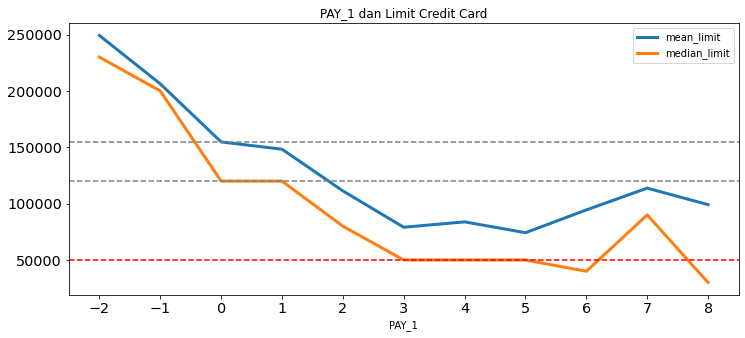

In [99]:
df_pay1.plot(x = "PAY_1", kind = "line")
plt.xticks(range(-2, 9, 1),rotation = 0)
plt.axhline(y=154739, color='gray', ls='--', lw=1.5)
plt.axhline(y=120000, color='gray', ls='--', lw=1.5)
plt.axhline(y=50000, color='red', ls='--', lw=1.5)
plt.title("PAY_1 dan Limit Credit Card")
plt.show()

Hasil pengamatan :
* Nasabah yang memiliki rata-rata limit di atas NTD 155000 atau median limit di atas  NTD 120000 tidak mengalami payment delay.
* Nasabah yang menunda pembayaran paling lama (8 bulan atau lebih) justru merupakan nasabah dengan median limit terendah (NTD 30000).
* Semakin kecil limitnya, nilai PAY_1 cenderung semakin besar.

## Hubungan Limit Kredit dan BILL_AMT4

In [100]:
df_billamt4 = round(df1.groupby("limit_cat").agg({"BILL_AMT4" : ["mean","median"]}).reset_index(),2)
df_billamt4.columns = ["limit_cat", "mean_bill_amt4", "median_bill_amt4"]

df_billamt4['limit_cat'] = df_billamt4['limit_cat'].replace("extremely high", 1)
df_billamt4['limit_cat'] = df_billamt4['limit_cat'].replace("high", 2)
df_billamt4['limit_cat'] = df_billamt4['limit_cat'].replace("medium", 3)
df_billamt4['limit_cat'] = df_billamt4['limit_cat'].replace("low", 4)

df_billamt4 = df_billamt4.sort_values("limit_cat",ascending = True)
df_billamt4 = df_billamt4.reset_index()

df_billamt4.drop(["index"],axis =1)

,limit_cat,mean_bill_amt4,median_bill_amt4
0,1,170461.54,90025.0
1,2,85350.38,22500.5
2,3,55564.40,11944.0
3,4,32572.62,19860.0


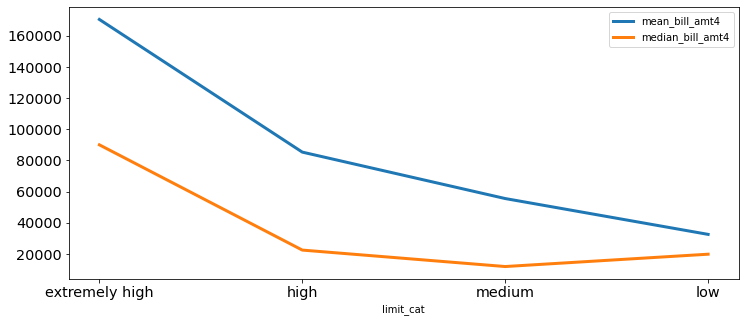

In [101]:
df_billamt4.plot(x = "limit_cat", y = ["mean_bill_amt4","median_bill_amt4"], kind = "line")
plt.xticks([1,2,3,4],["extremely high","high","medium","low"],rotation = 0)
plt.show()

Dari meannya, semakin rendah limitnya, semakin rendah pula nilai BILL_AMT4-nya.

## Hubungan Limit Kredit dan BILL_AMT5

In [102]:
df_billamt5 = round(df1.groupby("limit_cat").agg({"BILL_AMT5" : ["mean","median"]}).reset_index(),2)
df_billamt5.columns = ["limit_cat", "mean_bill_amt5", "median_bill_amt5"]

df_billamt5['limit_cat'] = df_billamt5['limit_cat'].replace("extremely high", 1)
df_billamt5['limit_cat'] = df_billamt5['limit_cat'].replace("high", 2)
df_billamt5['limit_cat'] = df_billamt5['limit_cat'].replace("medium", 3)
df_billamt5['limit_cat'] = df_billamt5['limit_cat'].replace("low", 4)

df_billamt5 = df_billamt5.sort_values("limit_cat",ascending = True)
df_billamt5 = df_billamt5.reset_index()

df_billamt5.drop(["index"],axis =1)

,limit_cat,mean_bill_amt5,median_bill_amt5
0,1,156694.39,83504.0
1,2,79083.77,22844.0
2,3,52277.85,10695.5
3,4,30116.00,19050.0


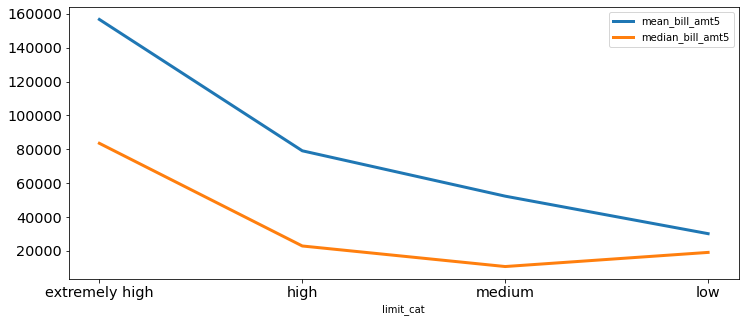

In [103]:
df_billamt5.plot(x = "limit_cat", y = ["mean_bill_amt5","median_bill_amt5"], kind = "line")
plt.xticks([1,2,3,4],["extremely high","high","medium","low"],rotation = 0)
plt.show()

Dari meannya, semakin rendah limitnya, semakin rendah pula nilai BILL_AMT5-nya.

# Business Insight
1. Dari total 4645 nasabah yang default 57,31% adalah wanita
2. Nasabah yang cenderung memiliki potensi tinggi default di rentang usia 25 tahun sampai 30 tahun
3. Berdasarkan status Marriage, status single memiliki 50.85% default dari total default dan diposisi kedua status menikah dengan 47.75% yang default dari total default
4. Mayoritas nasabah yang default memiliki limit credit yang rendah
5. Semakin rendah tingkat pendidikan terakhir nasabah , semakin rendah juga limit credit nasabah tersebut

**Rekomendasi Bisnis** <br>
1. Memberikan kemudahan untuk mengajukan peningkatan limit kepada pemegang kartu kredit yang melakukan payment tepat waktu

2. Nasabah yang terdeteksi berpotensi akan gagal bayar , segera dihubungi lebih dulu dan ditawarkan solusi

## Rekomendasi Pre-Processing

1. Kolom ID akan di drop karena merupakan identifier dari tiap baris yang nilainya unik dan tidak dapat memberikan informasi apa-apa dalam analisis.
2. Merubah kolom PAY_0 menjadi PAY_1
3. Terdapat nilai yang belum terdefinisi pada kolom EDUCATION akan diubah menjadi unknown
4. Terdapat nilai minus pada kolom BILL_AMT1 - BILL_AMT6 hal itu wajar terjadi tetapi nilai tersebut akan di drop karena outlier
5. Pada visualisasi boxplot terdapat banyak outlier di kolom PAY_AMT1 - PAY_AMT 6 dan BILL_AMT1-BILL_AMT6, untuk penanganannya akan memfilter outlier dengan menggunakan z-score , kemudian akan dicek distribusi datanya setelah difilter
6. Melakukan sedikit experiment perbandingan antara z-score dengan IQR untuk pengematan perbandingan hasil akurasinya
7. Kolom PAY, BILL_AMT,PAY_AMT memiliki hubungan sebab akibat,kita akan memilih salah satu nya atau akan kami pertimbangkan lebih lanjut untuk tidak drop kolom tersebut sebagai bahan pertimbangan akurasi model kedepannya
